# CS 6220 Data Mining --- Final project

Analysis on Global Warming

-- [Sub-project] analyze the Fossil & Renewable Energy in Carbon Budget

Student: Tianyang Ge

## Summary
For this task, we want to analyze the fossil and renewable energy changes and influence on carbon emissions. 

First of all, we visualize the changes on different fossil these years(1990 - 2019).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fossil = pd.read_csv('Data/FossilData/fossil_changes.csv')

<AxesSubplot:xlabel='Year'>

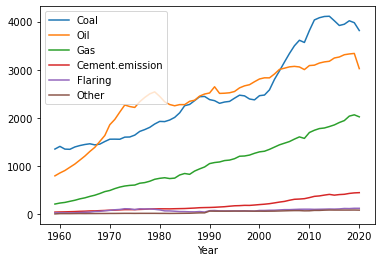

In [29]:
fossil.set_index('Year')[['Coal','Oil','Gas','Cement.emission','Flaring','Other']].plot()

We picked coal, oil, gas, cement emission and flaring as the main fossile source of carbon emissions. All values in million tonnes of carbon per year (MtC/yr). In general, the use of fossile is gradually increasing each year. The decrease in 2020 is most likely because COVID restricts the travel and production. Although the plot reveals the primary source are still Oil and Coal,the gas rises up with a more constant rate indicating the potential of future. The carbon budget could be more reliable on gas usage.

In [5]:
DF = pd.read_csv('Data/FossilData/World Energy Consumption.csv')
DF=DF[DF['year']>=1990]
Countries=['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India']
#filter columns
DF=DF.loc[DF['country'].isin(Countries)]
DF=DF[['country','year','coal_production','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','renewables_electricity','oil_production','primary_energy_consumption','gdp','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_elec','gas_share_elec','gas_production','low_carbon_share_elec']]
nulls=DF.isna().sum()
nulls=DF.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        DF[i].ffill(inplace=True)
        DF[i].bfill(inplace=True)
DF

,country,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,primary_energy_consumption,gdp,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec
4951,Egypt,1990,1454.183,41.952,0.314,0.000,32.000,16.446,9.953,0.000,...,394.686,2.530000e+11,0.000,0.000,1.560,7031.142,76.276,39.201,77.674,23.724
4952,Egypt,1991,1454.183,43.276,0.314,0.000,33.360,20.406,9.916,0.000,...,399.793,2.610000e+11,0.000,0.000,1.532,6962.011,77.087,47.154,87.395,22.913
4953,Egypt,1992,1454.183,44.987,0.314,0.000,35.187,22.944,9.800,0.000,...,399.271,2.690000e+11,0.000,0.000,1.484,6805.716,78.216,51.003,94.518,21.784
4954,Egypt,1993,1454.183,46.737,0.314,0.000,36.644,26.172,10.092,0.000,...,403.498,2.790000e+11,0.000,0.000,1.446,6738.334,78.406,56.000,108.666,21.594
4955,Egypt,1994,1454.183,48.550,0.314,0.000,37.822,29.292,10.728,0.000,...,411.293,2.900000e+11,0.000,0.000,1.418,6731.917,77.903,60.333,116.463,22.097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16365,United States,2016,4083.578,4095.487,62.760,1239.149,2668.222,1391.114,261.126,805.694,...,25560.520,1.720000e+13,54.866,226.993,1.486,79130.818,65.150,33.967,7273.567,34.850
16366,United States,2017,4350.382,4058.261,62.762,1205.835,2549.205,1308.884,293.839,804.950,...,25647.389,1.720000e+13,77.276,254.303,1.486,78894.410,62.815,32.252,7461.713,37.185
16367,United States,2018,4277.455,4203.937,61.901,1145.962,2666.350,1482.189,286.619,807.084,...,26556.388,1.720000e+13,93.365,272.650,1.486,81188.359,63.425,35.257,8358.659,36.575
16368,United States,2019,3972.480,4161.834,57.507,964.957,2595.032,1598.303,282.613,809.409,...,26291.355,1.720000e+13,106.894,294.906,1.486,79897.151,62.353,38.404,9208.816,37.647


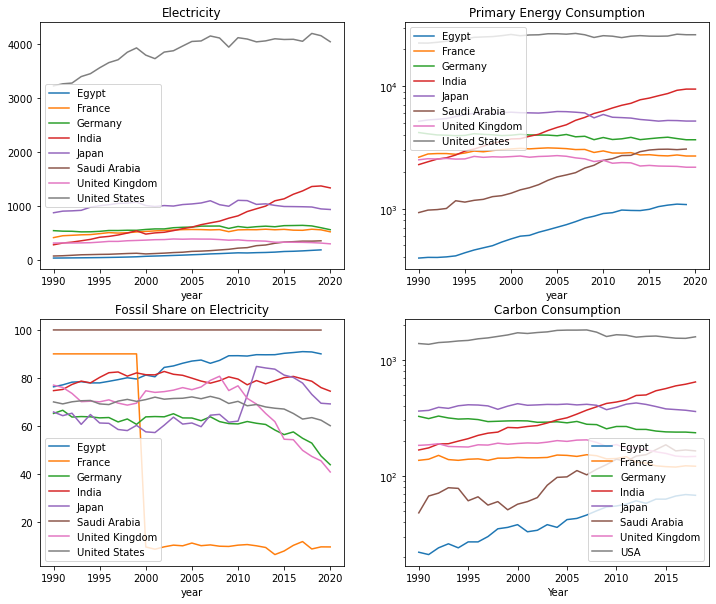

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
DF.set_index('year').groupby(['country'])['electricity_generation'].plot(ax=ax[0, 0], legend=True)
DF.set_index('year').groupby(['country'])['primary_energy_consumption'].plot(ax=ax[0,1], legend=True, logy = True)
DF.set_index('year').groupby(['country'])['fossil_share_elec'].plot(ax=ax[1, 0], legend=True)

CB = pd.read_csv('carbon.csv', encoding = 'gbk')
Countries=['Year', 'Egypt','France','Germany','India', 'Japan','Saudi Arabia','United Kingdom', 'USA']
CB = CB[Countries]
CB=CB[CB['Year']>=1990]
CB.set_index('Year').plot(logy = True, ax=ax[1, 1])

ax[0, 0].title.set_text('Electricity')
ax[0 , 1].title.set_text('Primary Energy Consumption')
ax[1, 0].title.set_text('Fossil Share on Electricity')
ax[1, 1].title.set_text('Carbon Consumption')

To figure out the relationship among carbon emission and several factors, we visualize the change of electricity, population and fossil share from 1990 to 2019. Obviously the electricity and primary energy consumption has more significant influence on carbon emission. For example, United States has the highest electricity consumption and primary energy consumption result in the highest carbon consumption. Likewise, the energy and electricity trend of India also reflects the trend of carbon consumption. Fossil share is surprisingly more unrelated. 

In [72]:
DF = pd.read_csv('Data/FossilData/World Energy Consumption.csv')
energy_consumption = ["iso_code","country", "year", "renewables_consumption","other_renewable_consumption","hydro_consumption","solar_consumption","wind_consumption", "oil_consumption", "coal_consumption", "gas_consumption"]
renewable_consumption = ["hydro_consumption","solar_consumption","wind_consumption","other_renewable_consumption", "oil_consumption", "coal_consumption", "gas_consumption"]
energy_df = DF[energy_consumption]
year_range = energy_df["year"].isin(range(1990,2020))
energy_df = energy_df[year_range]
bar = energy_df.groupby('year')[renewable_consumption].sum()
bar.reset_index(level=0, inplace=True)

<AxesSubplot:title={'center':'Global Renewable Consumption 1990 - 2020'}, xlabel='year', ylabel='Terrawatt Hour'>

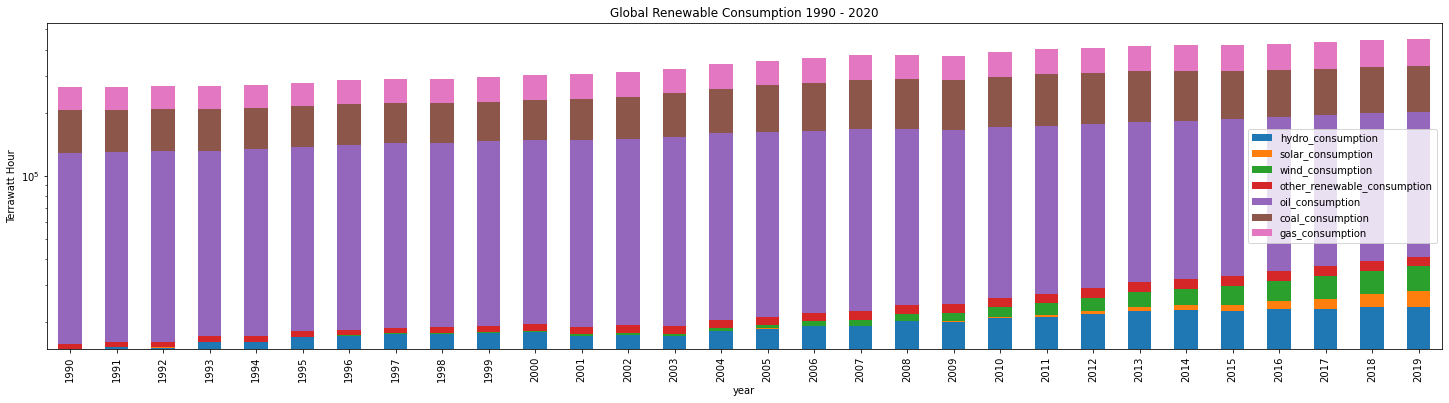

In [74]:
year_range = energy_df["year"].isin(range(1990,2020))
energy_df = energy_df[year_range]
bar = energy_df.groupby('year')[renewable_consumption].sum()
bar.reset_index(level=0, inplace=True)
bar.plot(x='year', ylabel='Terrawatt Hour', kind='bar',logy = True, stacked=True,figsize=(25,6),
        title='Global Renewable Consumption 1990 - 2020')

According to the observation on fossil consumption, we will find the renewable consumption is the trend of future energy.It could highly reduce the carbon budget on traffic or electricity. This plot reveals the share of different type energy each year and although the renewable source increase these years, they are still much less than fossil. 